In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Importa a Planilha Médica como Dataframe e cria uma nova coluna

In [2]:
df=pd.read_csv('medical_examination.csv')
df['overweight'] = ""
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,


Normalizando os dados (Height para Metros , gluc e colestrol de acordo com as condições abaixo)

In [3]:
df.loc[df['gluc'] == 1,'gluc'] = 0 #normalizando dados de gluc (0 para dados igual a 1)
df.loc[df['gluc'] > 1,'gluc'] = 1
df.loc[df['cholesterol'] == 1,'cholesterol'] = 0 #normalizando dados de colesterol
df.loc[df['cholesterol'] > 1,'cholesterol'] = 1 #normalizando dados de colesterol
df['height']=df['height']/100
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,
69997,99996,19066,2,1.83,105.0,180,90,1,0,0,1,0,1,
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,


Calculando o "overweight baseado no BMI  weight/square(height)

In [4]:
df['overweight'] = round(np.array(df['weight'])/np.square(df['height']),1) #calculando o BMI
df['overweight'] = np.where(df['overweight']>25,1,0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,1.83,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


Transpondo a coluna, renomeando para estar pronto para Plotagem

In [5]:

plotDf = pd.melt(df,value_vars=['active','alco','cholesterol','gluc','overweight','smoke'],id_vars='cardio')
rplot=plotDf.value_counts().to_frame().reset_index()
rplot=rplot.rename(columns={0:'total'})
rplot

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,active,1,28643
7,1,gluc,0,28585
8,1,active,1,27618
9,1,overweight,1,24362


Plot

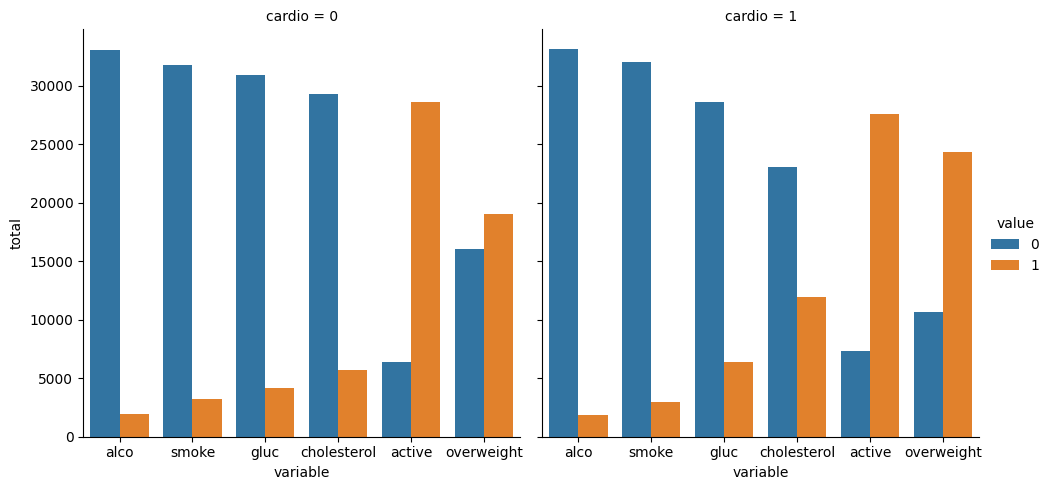

In [10]:
sns.catplot(data=rplot,x='variable',y='total',hue='value',col='cardio',kind='bar')